In [16]:
import numpy as np

true_path = 'true.npy'

exp1 = 'ETTm1_DLinear_ETTh1_ftM_sl48_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_\'Exp\'_0'
exp2 = 'ETTm1_FreLinear_ETTh1_ftM_sl48_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_\'Exp\'_0'
exp3 = 'ETTm1_NLinear_ETTh1_ftM_sl48_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_\'Exp\'_0'

pre_arr1 = np.load(f'../results/{exp1}/pred.npy')
pre_arr2 = np.load(f'../results/{exp2}/pred.npy')
pre_arr3 = np.load(f'../results/{exp3}/pred.npy')
true_arr = np.load(f'../results/{true_path}')

true_arr.shape, pre_arr1.shape

((2784, 96, 7), (2784, 96, 7))

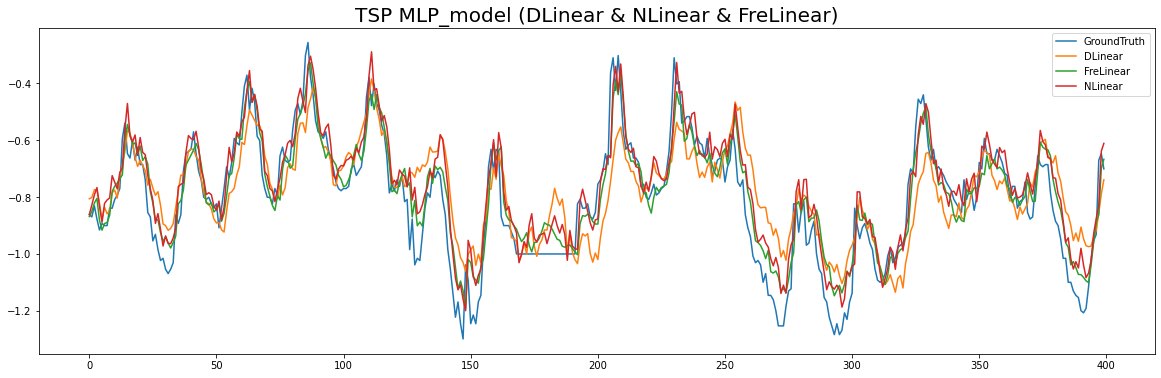

In [90]:
import matplotlib.pyplot as plt

M, N = 0, 400

plt.figure(figsize=(20, 6))
plt.plot(true_arr[M:N, 0,-1], label='GroundTruth')
plt.plot(pre_arr1[M:N, 0,-1], label='DLinear')
plt.plot(pre_arr2[M:N, 0,-1], label='FreLinear')
plt.plot(pre_arr3[M:N, 0,-1], label='NLinear')

plt.title('TSP MLP_model (DLinear & NLinear & FreLinear)', fontsize=20)
plt.savefig('./')
plt.legend()
plt.show()

[0 1 2]
[0.5623832941055298, 0.4658452272415161, 0.4039539694786072]
[0.49657365679740906, 0.45610901713371277, 0.41343602538108826]
[0.7123115062713623, 0.648297905921936, 0.6036979556083679]
[0.7499222159385681, 0.682528555393219, 0.6355737447738647]


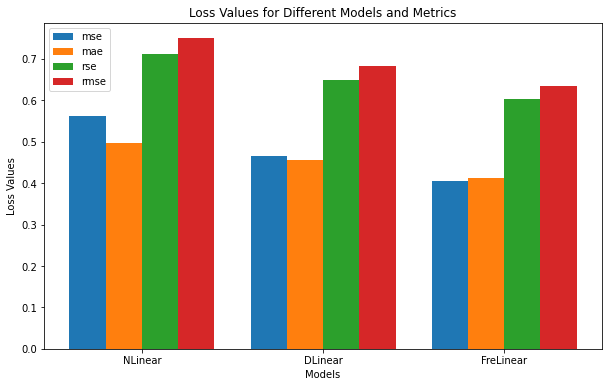

In [89]:
'''
NLinear
mse:0.5623832941055298, mae:0.49657365679740906, rse:0.7123115062713623, rmse:0.7499222159385681

DLinear
mse:0.4658452272415161, mae:0.45610901713371277, rse:0.648297905921936, rmse:0.682528555393219

FreLinear
mse:0.4039539694786072, mae:0.41343602538108826, rse:0.6036979556083679, rmse:0.6355737447738647

'''
import matplotlib.pyplot as plt
import numpy as np

models = ['NLinear', 'DLinear', 'FreLinear']
metrics = ['mse', 'mae', 'rse', 'rmse']

data = {
    'NLinear': [0.5623832941055298, 0.49657365679740906, 0.7123115062713623, 0.7499222159385681],
    'DLinear': [0.4658452272415161, 0.45610901713371277, 0.648297905921936, 0.682528555393219],
    'FreLinear': [0.4039539694786072, 0.41343602538108826, 0.6036979556083679, 0.6355737447738647]
}

bar_width = 0.2
index = np.arange(len(models))
print(index)

# 设置颜色
colors = ['blue', 'green', 'orange', 'red']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

k = 0
alpha = [1, 1, 1, 1]

for i, metric in enumerate(metrics):
    values = [data[model][i] for model in models]
    print(values)
    t = index + i * bar_width
    ax.bar(t, values, width=bar_width, label=metric, alpha=alpha[i])

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Loss Values')
ax.set_title('Loss Values for Different Models and Metrics')
ax.set_xticks(index + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()